In [1]:
!pip install fastai

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from random import uniform, choice
import pandas as pd
import seaborn as sns

### 1. Load the Dataset

In [3]:
# Load the MNIST dataset
path = untar_data(URLs.MNIST)
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing',
                                   valid_pct=0.2, seed=42,
                                   item_tfms=Resize(28),
                                   batch_tfms=Normalize.from_stats(*imagenet_stats))

### 2. Understanding the Data

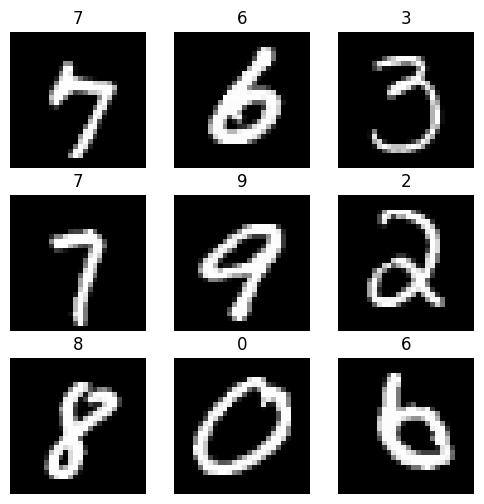

In [4]:
# Inspect the structure and format of the dataset
dls.show_batch(max_n=9, figsize=(6,6))

### 3. Data Exploration and Visualization

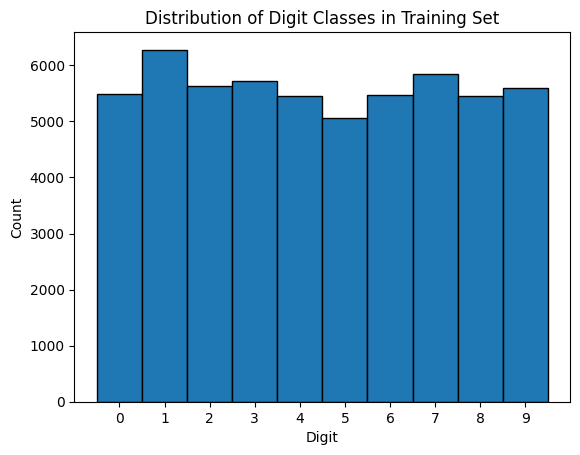

In [5]:
# Plot histogram of digit classes
def plot_digit_histogram(dls):
    labels = [y for _, y in dls.train_ds]
    plt.hist(labels, bins=np.arange(11)-0.5, edgecolor='black')
    plt.xticks(np.arange(10))
    plt.xlabel('Digit')
    plt.ylabel('Count')
    plt.title('Distribution of Digit Classes in Training Set')
    plt.show()

plot_digit_histogram(dls)

### 4. Data Preprocessing

In [6]:
# Normalize pixel values and augment the dataset
batch_tfms = [Normalize.from_stats(*imagenet_stats),
              *aug_transforms(do_flip=False, max_rotate=10, max_zoom=1.1)]

dls = ImageDataLoaders.from_folder(path, train='training', valid='testing',
                                   valid_pct=0.2, seed=42,
                                   item_tfms=Resize(28),
                                   batch_tfms=batch_tfms)

### 5. Creating DataLoaders

In [7]:
# DataLoaders with batch size and transformation parameters
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing',
                                   valid_pct=0.2, seed=42,
                                   item_tfms=Resize(28),
                                   batch_tfms=batch_tfms,
                                   bs=64)

### 6. Initializing and Training the Model

In [8]:
# Initialize a CNN model
learn = vision_learner(dls, resnet18, metrics=accuracy)

# Train the model
learn.fit_one_cycle(2) # original: 5

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.324732,0.196561,0.937857,02:07
1,0.199882,0.139234,0.956286,02:07


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


### 7. Model Evaluation

In [9]:
# Evaluate the model's performance
learn.validate()

(#2) [0.13923437893390656,0.9562857151031494]

### 8. Fine-tuning and Optimization

epoch,train_loss,valid_loss,accuracy,time
0,0.169706,0.106539,0.967143,02:13
1,0.147088,0.082429,0.974929,02:10
2,0.112812,0.069957,0.978000,02:14
3,0.111065,0.068580,0.978000,02:13
4,0.098049,0.070936,0.977643,02:14


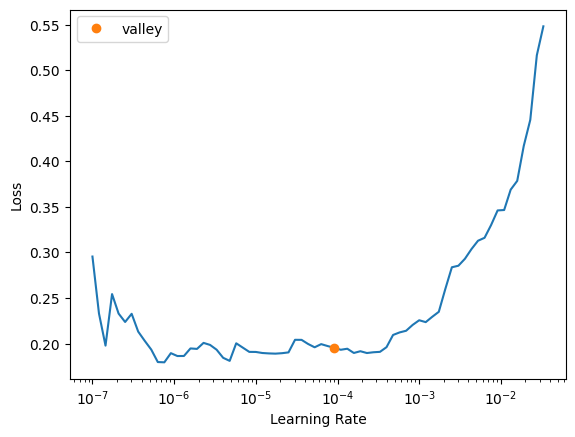

In [10]:
# Fine-tune the model by adjusting hyperparameters
learn.unfreeze()
learn.lr_find()
learn.fit_one_cycle(5, lr_max=slice(1e-6, 1e-4))

### 9. Model Interpretation

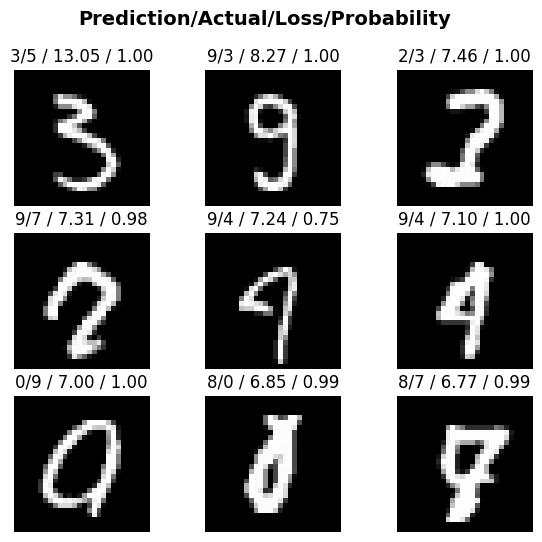

In [11]:
# Interpret the model's predictions
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(7, 6))

### 10. Visualizing Results

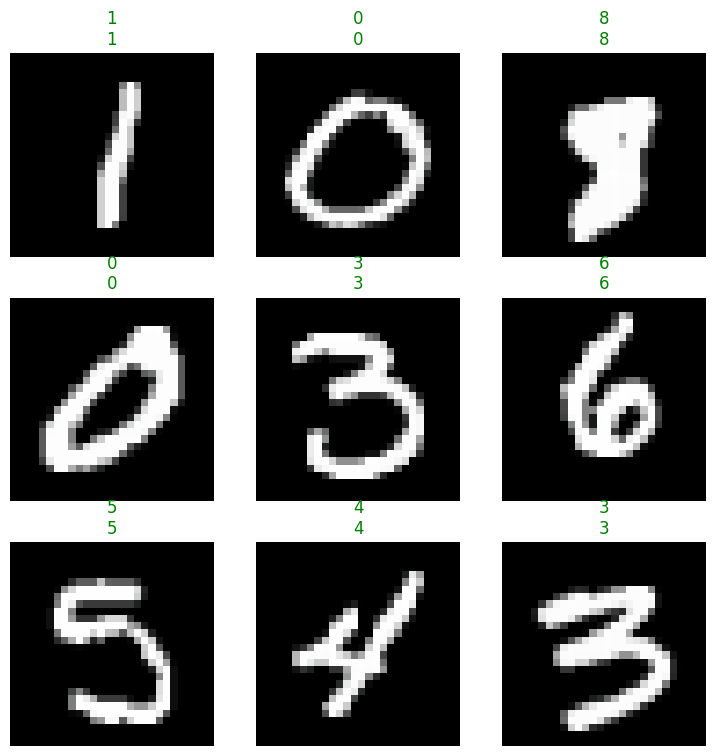

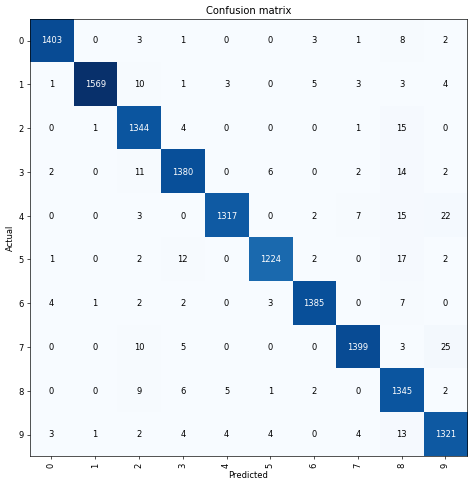

In [12]:
# Visualize the model's predictions
learn.show_results()

# Plot confusion matrix
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

### A. Experimenting with Different CNN Architectures

In [13]:
# Initialize a ResNet model
learn_resnet = cnn_learner(dls, resnet34, metrics=accuracy)

# Train the ResNet model
learn_resnet.fit_one_cycle(5)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 185MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.470409,0.258484,0.917357,02:19
1,0.166920,0.112704,0.962143,02:18
2,0.114177,0.059228,0.980286,02:18


KeyboardInterrupt: 

In [ ]:
# Initialize a DenseNet model
learn_densenet = cnn_learner(dls, densenet121, metrics=accuracy)

# Train the DenseNet model
learn_densenet.fit_one_cycle(5)

### B. Step 2: Hyperparameter Tuning

In [ ]:
# Define parameter grid
param_grid = {
    'epochs': [5, 10],
    'lr': [1e-3, 1e-4],
    'batch_size': [32, 64]
}

# Grid search
for params in ParameterGrid(param_grid):
    dls = ImageDataLoaders.from_folder(path, train='training', valid='testing',
                                       valid_pct=0.2, seed=42,
                                       item_tfms=Resize(28),
                                       batch_tfms=batch_tfms,
                                       bs=params['batch_size'])
    learn = cnn_learner(dls, resnet34, metrics=accuracy)
    learn.fit_one_cycle(params['epochs'], lr_max=params['lr'])
    acc = learn.validate()[1]
    print(f"Params: {params}, Accuracy: {acc}")

In [ ]:
# Define parameter ranges
param_ranges = {
    'epochs': [5, 10],
    'lr': [1e-5, 1e-3],
    'batch_size': [32, 64]
}

# Random search
for _ in range(5):  # Number of iterations
    params = {
        'epochs': choice(param_ranges['epochs']),
        'lr': 10 ** uniform(-5, -3),
        'batch_size': choice(param_ranges['batch_size'])
    }
    dls = ImageDataLoaders.from_folder(path, train='training', valid='testing',
                                       valid_pct=0.2, seed=42,
                                       item_tfms=Resize(28),
                                       batch_tfms=batch_tfms,
                                       bs=params['batch_size'])
    learn = cnn_learner(dls, resnet34, metrics=accuracy)
    learn.fit_one_cycle(params['epochs'], lr_max=params['lr'])
    acc = learn.validate()[1]
    print(f"Params: {params}, Accuracy: {acc}")

### C. Creating Visualizations for Hyperparameter Impact

In [ ]:
# Collect results
results = []

# Hyperparameter tuning loop
for params in ParameterGrid(param_grid):
    dls = ImageDataLoaders.from_folder(path, train='training', valid='testing',
                                       valid_pct=0.2, seed=42,
                                       item_tfms=Resize(28),
                                       batch_tfms=batch_tfms,
                                       bs=params['batch_size'])
    learn = cnn_learner(dls, resnet34, metrics=accuracy)
    learn.fit_one_cycle(params['epochs'], lr_max=params['lr'])
    acc = learn.validate()[1]
    results.append({'epochs': params['epochs'], 'lr': params['lr'], 'batch_size': params['batch_size'], 'accuracy': acc})

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot results
sns.set(style="whitegrid")
sns.lineplot(data=results_df, x='epochs', y='accuracy', hue='batch_size')
plt.title('Impact of Hyperparameters on Accuracy')
plt.show()

### 4. Transfer Learning with Pre-trained Models

In [ ]:
# Load pre-trained ResNet model
learn_tl = cnn_learner(dls, resnet34, pretrained=True, metrics=accuracy)

# Fine-tune the model
learn_tl.fit_one_cycle(5, lr_max=1e-3)

# Unfreeze and further fine-tune
learn_tl.unfreeze()
learn_tl.fit_one_cycle(5, lr_max=slice(1e-6, 1e-4))

In [ ]:
# Interpret the model's predictions
interp_tl = ClassificationInterpretation.from_learner(learn_tl)
interp_tl.plot_top_losses(9, figsize=(7, 6))
interp_tl.plot_confusion_matrix(figsize=(8,8), dpi=60)